In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=35,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('images/train',
                                                 target_size = (48, 48),
                                                 batch_size = 16,
                                                 color_mode = 'grayscale', 
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = train_datagen.flow_from_directory('images/test',
                                            target_size = (48, 48),
                                            batch_size = 16,
                                            color_mode = 'grayscale', 
                                            class_mode = 'categorical',)

Found 7178 images belonging to 7 classes.


In [4]:
cnn = tf.keras.models.Sequential()

# Layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='same', input_shape=[48, 48, 1]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

# Layer 3
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Layer 4
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))

In [5]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

C:\Users\gufra\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                        

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97 and logs.get('val_accuracy')>0.94):
      print("\nSELESAI")
      self.model.stop_training = True
callbacks = myCallback()

In [8]:
model = cnn.fit(
          training_set,
          epochs=50,
          validation_data=validation_generator,
          callbacks=[callbacks]
          )

Epoch 1/50
1795/1795 [==============================] - 70s 38ms/step - loss: 2.2203 - accuracy: 0.2115 - val_loss: 1.8359 - val_accuracy: 0.2857
Epoch 2/50
1795/1795 [==============================] - 71s 40ms/step - loss: 1.9168 - accuracy: 0.2603 - val_loss: 1.7543 - val_accuracy: 0.2970
Epoch 3/50
1795/1795 [==============================] - 71s 40ms/step - loss: 1.8125 - accuracy: 0.2900 - val_loss: 1.6889 - val_accuracy: 0.3355
Epoch 4/50
1795/1795 [==============================] - 70s 39ms/step - loss: 1.7522 - accuracy: 0.3114 - val_loss: 1.6211 - val_accuracy: 0.3663
Epoch 5/50
1795/1795 [==============================] - 70s 39ms/step - loss: 1.6944 - accuracy: 0.3337 - val_loss: 1.5763 - val_accuracy: 0.3858
Epoch 6/50
1795/1795 [==============================] - 70s 39ms/step - loss: 1.6444 - accuracy: 0.3585 - val_loss: 1.5525 - val_accuracy: 0.3994
Epoch 7/50
1795/1795 [==============================] - 70s 39ms/step - loss: 1.6081 - accuracy: 0.3725 - val_loss: 1.5161 -

In [9]:
import matplotlib.pyplot as plt

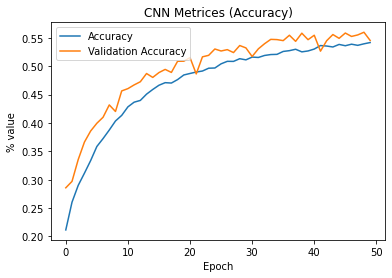

In [11]:
plt.plot(model.history['accuracy'], label='Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

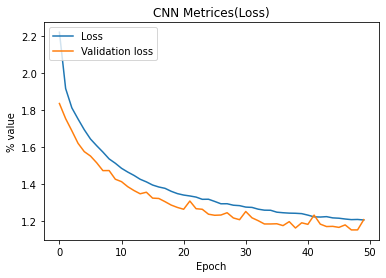

In [12]:
plt.plot(model.history['loss'], label='Loss')
plt.plot(model.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [14]:
cnn.save("model.h5")